In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
kr_df_med = pd.read_csv('../src/KR_Medical_Waste.csv', header='infer')

In [5]:
kr_df_med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   업체명     13 non-null     object 
 1   2017    13 non-null     float64
 2   2021    13 non-null     float64
 3   2022    13 non-null     float64
dtypes: float64(3), object(1)
memory usage: 544.0+ bytes


In [6]:
kr_df_med.describe()

,2017,2021,2022
count,13.000000,13.000000,13.000000
mean,15841.276923,16298.576154,8155.468462
std,12698.932387,9524.388384,4451.375375
min,1799.740000,3577.440000,1823.790000
25%,5986.010000,8730.440000,4831.200000
50%,9801.840000,17521.350000,8153.730000
75%,23205.360000,19449.650000,10535.810000
max,40417.030000,34929.560000,16071.190000


In [7]:
df = kr_df_med.copy()  
df['target'] = df['2022']   
print(df.head())

            업체명      2017      2021      2022    target
0         (주)경서   1799.74   6363.40   4831.20   4831.20
1       (주)디디에스   4092.69  10695.88   5459.09   5459.09
2  (주)스테리싸이클코리아  34969.74  34929.56  16071.19  16071.19
3       (주)아림환경  22463.80  17521.35   8941.49   8941.49
4  (주)에코비트에너지경주  40417.03  30903.76  16013.73  16013.73


In [8]:
df = kr_df_med.copy()
df['target'] = df['2021']
print(df.head())

            업체명      2017      2021      2022    target
0         (주)경서   1799.74   6363.40   4831.20   6363.40
1       (주)디디에스   4092.69  10695.88   5459.09  10695.88
2  (주)스테리싸이클코리아  34969.74  34929.56  16071.19  34929.56
3       (주)아림환경  22463.80  17521.35   8941.49  17521.35
4  (주)에코비트에너지경주  40417.03  30903.76  16013.73  30903.76


In [9]:
years = ['2017', '2021', '2022']

max_values = kr_df_med[years].max().values
max_companies = kr_df_med.loc[kr_df_med[years].idxmax(), '업체명'].values

outcome = pd.DataFrame({'Year': years, 'Company': max_companies, 'Value': max_values})
print(outcome)

   Year       Company     Value
0  2017  (주)에코비트에너지경주  40417.03
1  2021  (주)스테리싸이클코리아  34929.56
2  2022  (주)스테리싸이클코리아  16071.19


In [10]:
kr_df_med['Highest Year'] = kr_df_med[years].idxmax(axis=1)
print(kr_df_med[['업체명', 'Highest Year']])

               업체명 Highest Year
0            (주)경서         2021
1          (주)디디에스         2021
2     (주)스테리싸이클코리아         2017
3          (주)아림환경         2017
4     (주)에코비트에너지경주         2017
5     (주)에코비트에너지광주         2017
6        (주)엔비텍코리아         2017
7          (주)이메디원         2021
8          도시환경(주)         2017
9          엔씨메디(주)         2021
10    주식회사 에코비트에너지         2021
11  주식회사 에코비트에너지경산         2021
12         창광실업(주)         2017


In [11]:
company_data = kr_df_med[kr_df_med['업체명'] == '(주)스테리싸이클코리아'].copy()
years = ['2017', '2021', '2022']
company_data.loc[:,'Top Waste Year'] = company_data[years].idxmax(axis=1)#
print(company_data[['업체명', 'Top Waste Year']])

            업체명 Top Waste Year
2  (주)스테리싸이클코리아           2017


In [12]:
for year in years:
    company_data[f'{year} Max Value'] = company_data[year]

print(company_data[['업체명']+[f'{year} Max Value' for year in years]])

            업체명  2017 Max Value  2021 Max Value  2022 Max Value
2  (주)스테리싸이클코리아        34969.74        34929.56        16071.19


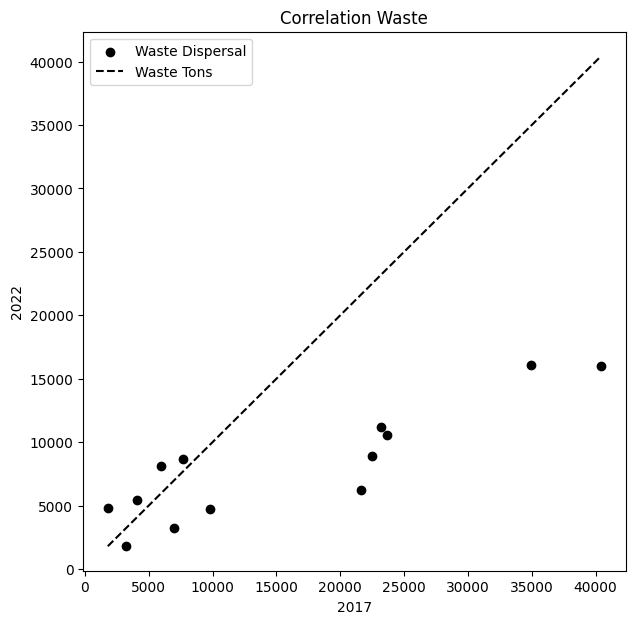

In [13]:
x = kr_df_med['2017']  # Feature
y = kr_df_med['2022']  # Target

plt.figure(figsize=(7, 7))
plt.scatter(x, y, color='black', label="Waste Dispersal")

min_val = min(x.min(), y.min())  
max_val = max(x.max(), y.max())  
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='dashed', label="Waste Tons")

plt.xlabel("2017")
plt.ylabel("2022")
plt.title("Correlation Waste")
plt.legend()
plt.grid(False)
plt.show()

In [16]:
X = kr_df_med[['2017']]
y = kr_df_med[['2022']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)

Training set size: (10, 1) (10, 1)
Testing set size: (3, 1) (3, 1)


In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Model R^2 Score", model.score(X_test, y_test))

Model R^2 Score 0.11557253956522007


/Users/alex/Documents/allegsuf/programming/samsung/old_py_env/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


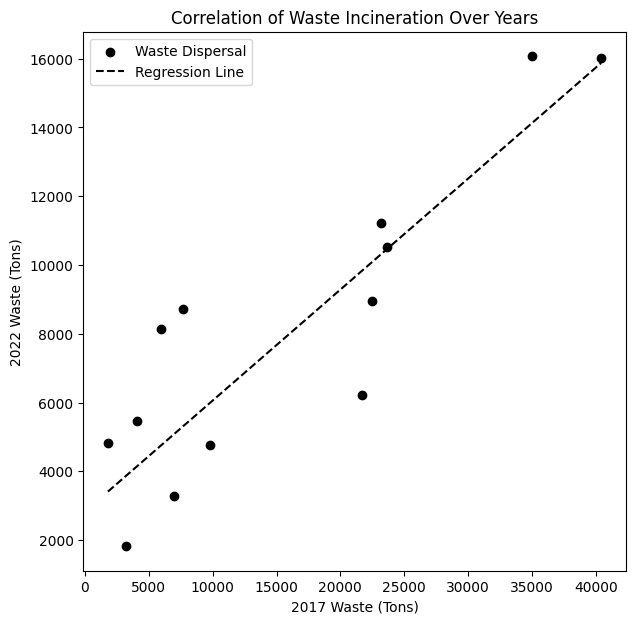

In [23]:
plt.figure(figsize=(7, 7))
plt.scatter(X, y, color='black', label="Waste Dispersal")  # Original data points

# Regression Line
x_range = np.linspace(X.min(), X.max(), 100)  # Create 100 evenly spaced points for smooth line
y_range = model.predict(x_range.reshape(-1, 1))  # Predict corresponding y-values
plt.plot(x_range, y_range, color='black', linestyle='dashed', label="Regression Line")

plt.xlabel("2017 Waste (Tons)")
plt.ylabel("2022 Waste (Tons)")
plt.title("Correlation of Waste Incineration Over Years")
plt.legend()
plt.grid(False)
plt.show()

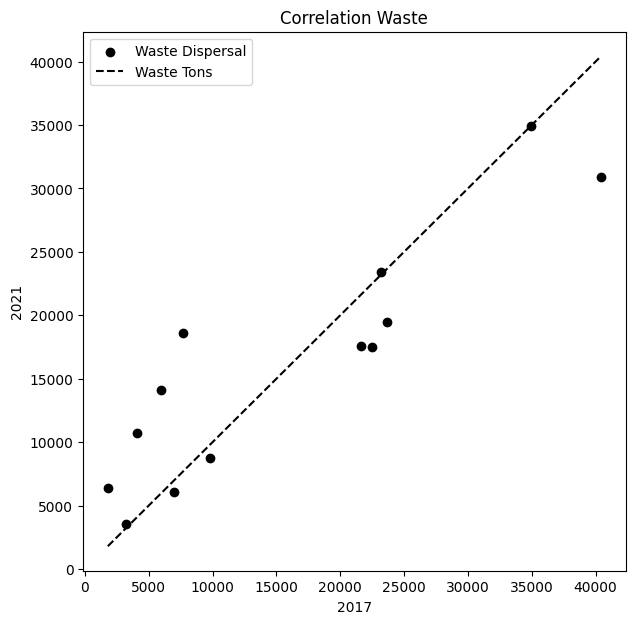

In [14]:
x2 = kr_df_med['2017']  # Feature
y2 = kr_df_med['2021']  # Target

plt.figure(figsize=(7, 7))
plt.scatter(x2, y2, color='black', label="Waste Dispersal")

min_val = min(x2.min(), y2.min())  
max_val = max(x2.max(), y2.max())  
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='dashed', label="Waste Tons")

plt.xlabel("2017")
plt.ylabel("2021")
plt.title("Correlation Waste")
plt.legend()
plt.grid(False)
plt.show()

Correlated Pearson between variables:
          2017      2021      2022
2017  1.000000  0.904600  0.880102
2021  0.904600  1.000000  0.974276
2022  0.880102  0.974276  1.000000
Most correlated variable: 2021 with value: 1.0


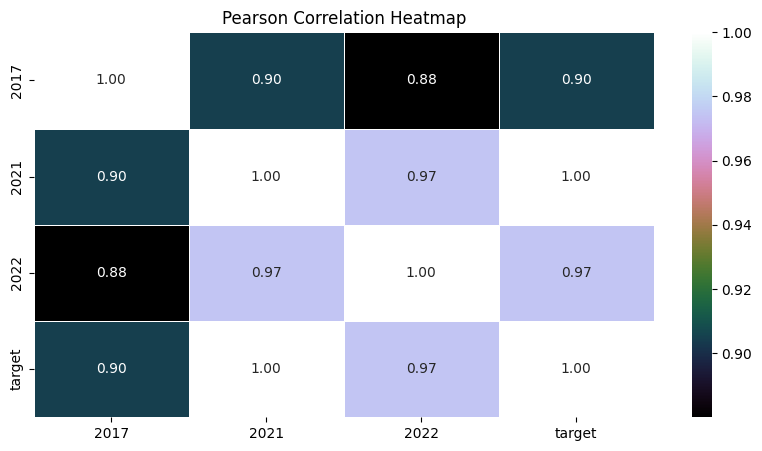

In [15]:

numeric_df = df.select_dtypes(include=['number'])

matrix_correlated = numeric_df.corr(method='pearson')

matrix_correlated_no_target = matrix_correlated.drop('target', axis=1).drop('target', axis=0)

print(f"Correlated Pearson between variables:\n{matrix_correlated_no_target}")

correlations = matrix_correlated['target'].drop('target')

variable_m_correlated = correlations.idxmax()  
value_m_correlated = correlations.max()  

print(f"Most correlated variable: {variable_m_correlated} with value: {value_m_correlated}")

plt.figure(figsize=(10, 5))
sns.heatmap(matrix_correlated, cmap='cubehelix', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()